In [2]:
from Code.utils import CremaD

In [2]:
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 2

# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
CMD = CremaD(path="./dataset/SAVEE/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
dataset = CMD.getDataSavee()

In [3]:
dataset

,Path,Emotions
0,./dataset/SAVEE/JK_sa01.wav,sad
1,./dataset/SAVEE/JK_sa15.wav,sad
2,./dataset/SAVEE/DC_n13.wav,neutral
3,./dataset/SAVEE/DC_n07.wav,neutral
4,./dataset/SAVEE/JK_n20.wav,neutral
...,...,...
415,./dataset/SAVEE/JK_n11.wav,neutral
416,./dataset/SAVEE/JK_n05.wav,neutral
417,./dataset/SAVEE/JE_a01.wav,angry
418,./dataset/SAVEE/JE_a15.wav,angry


In [6]:
SAMPLE_RATE = 44100
NUM_SAMPLE = 22050
DURATION = 3.84

CMD = CremaD(path="./dataset/SAVEE/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
waveform, emotion = CMD.getWaveformSAVEE()
print("/n")
print(len(waveform[0]))
print(emotion)

 Processed 420/420 audio waveforms/n
169344
[5, 5, 4, 4, 4, 4, 5, 1, 1, 5, 5, 2, 3, 3, 3, 2, 5, 5, 1, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 1, 5, 5, 2, 3, 3, 2, 5, 2, 5, 1, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 1, 1, 3, 5, 2, 5, 2, 1, 3, 0, 3, 3, 3, 0, 1, 2, 5, 2, 3, 1, 1, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 0, 1, 1, 2, 2, 5, 2, 3, 3, 3, 3, 2, 5, 2, 2, 1, 1, 4, 4, 0, 4, 4, 4, 5, 5, 4, 4, 3, 3, 1, 4, 0, 4, 0, 2, 5, 5, 3, 3, 3, 3, 5, 5, 2, 4, 0, 0, 4, 4, 1, 3, 3, 4, 4, 4, 4, 2, 3, 3, 4, 4, 0, 0, 5, 5, 3, 0, 3, 1, 1, 3, 3, 0, 5, 5, 0, 0, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3, 0, 4, 4, 5, 3, 3, 5, 4, 4, 0, 3, 3, 4, 4, 4, 4, 3, 0, 0, 4, 4, 5, 3, 3, 3, 5, 5, 4, 4, 0, 3, 4, 4, 4, 2, 1, 4, 4, 2, 2, 0, 1, 1, 0, 2, 4, 4, 1, 1, 2, 4, 4, 4, 2, 2, 1, 4, 2, 0, 0, 1, 1, 1, 0, 2, 4, 1, 2, 4, 4, 4, 4, 4, 2, 2, 3, 1, 1, 4, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 4, 1, 1, 3, 2, 2, 4, 4, 4, 2, 2, 1, 1, 4, 4, 0, 4, 2, 2, 5, 0, 3, 0, 1, 1, 1, 1, 3, 0, 0, 5, 2, 2, 4, 0, 4, 1, 1, 2, 2, 4, 5, 4, 4, 4, 0, 4, 0, 1, 2, 5, 5, 2, 3, 3, 1, 1, 0

In [ ]:
dataset["Emotions"].value_counts()

In [1]:
############## RAVDESS DATAFRAME ##############
import os
import pandas as pd
path = "./dataset/RAVDESS/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(path)

file_emotion = []
file_path = []
actor_list = []

for dir in ravdess_directory_list:
    actor = os.listdir(path + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        actor_id = dir.split('_')[-1] 
        actor_list.append(actor_id)
        file_emotion.append(int(part[2]))
        file_path.append(path + dir + '/' + file)

path_df = pd.DataFrame(file_path, columns=['Path'])
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
Ravdess_df = pd.concat([path_df, emotion_df], axis=1)

# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}

Ravdess_df.Emotions.replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust', 8:'Surprised'}, inplace=True)

In [2]:
pd.options.display.max_colwidth = 100
Ravdess_df
dataset = Ravdess_df[~Ravdess_df['Emotions'].str.contains('Calm|Surprised')]
dataset["Emotions"].value_counts()
dataset.reset_index(inplace = True, drop = True)

In [3]:
dataset["Emotions"].value_counts()

Happy      192
Sad        192
Angry      192
Fear       192
Disgust    192
Neutral     96
Name: Emotions, dtype: int64

In [4]:
dataset

,Path,Emotions
0,./dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav,Neutral
1,./dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav,Neutral
2,./dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav,Neutral
3,./dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav,Neutral
4,./dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav,Happy
...,...,...
1051,./dataset/RAVDESS/audio_speech_actors_01-24/Actor_24/03-01-07-01-02-02-24.wav,Disgust
1052,./dataset/RAVDESS/audio_speech_actors_01-24/Actor_24/03-01-07-02-01-01-24.wav,Disgust
1053,./dataset/RAVDESS/audio_speech_actors_01-24/Actor_24/03-01-07-02-01-02-24.wav,Disgust
1054,./dataset/RAVDESS/audio_speech_actors_01-24/Actor_24/03-01-07-02-02-01-24.wav,Disgust


# Train Test Data Split

In [5]:
# Data splitting
from sklearn.model_selection import train_test_split
import pandas as pd
X = dataset.drop(columns=["Emotions"])
y = dataset["Emotions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

test = pd.concat([X_test, y_test], axis=1)
train = pd.concat([X_train, y_train], axis=1)
print(f"Test Set Data : {len(test)}")
print(test["Emotions"].value_counts())
print(f"Train Set Data : {len(train)}")
print(train["Emotions"].value_counts())

Test Set Data : 317
Sad        58
Angry      58
Fear       58
Happy      57
Disgust    57
Neutral    29
Name: Emotions, dtype: int64
Train Set Data : 739
Disgust    135
Happy      135
Angry      134
Fear       134
Sad        134
Neutral     67
Name: Emotions, dtype: int64


In [6]:
# Move data RAVDESS
import os
import shutil

# List of filenames to move
test_list = test["Path"].tolist()
test = [i.split('/')[5] for i in test_list]
train_list = train["Path"].tolist()
train = [i.split('/')[5] for i in train_list]
test_source_list = [i.split('/')[4] for i in test_list]
train_source_list = [i.split('/')[4] for i in train_list]
# Source directory where the files are currently located
source_dir = './dataset/RAVDESS/audio_speech_actors_01-24/'
# Destination directory where the files will be moved to
dest_dir = './dataset/test_RAVDESS_30/'
dest_dir2 = './dataset/train_RAVDESS_70/'

# Loop through the file list and move each file to the destination directory
for x in test:
    for y in test_source_list:
        if os.path.isfile(source_dir + y + "/" + x):
            shutil.copy(source_dir + y + "/" + x, dest_dir)
            print(f"Moved {x} to {dest_dir}")
        else:
            pass

for x in train:
    for y in train_source_list:
        if os.path.isfile(source_dir + y + "/" + x):
            shutil.copy(source_dir + y + "/" + x, dest_dir2)
            print(f"Moved {x} to {dest_dir2}")
        else:
            pass

Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-03-01-02-01-01.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-04-02-01-01-05.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-04-02-01-01-05.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-04-02-01-01-05.wav to ./dataset/test_RAVDESS_30/
Moved 03-01-04-02-01-01-

In [11]:
# Move data CREMA-D
import os
import shutil

# List of filenames to move
test_list = test["Path"].tolist()
test = [i.split('/')[3] for i in test_list]
train_list = train["Path"].tolist()
train = [i.split('/')[3] for i in train_list]

# test_source_list = [i.split('/')[4] for i in test_list]
# train_source_list = [i.split('/')[4] for i in train_list]
# Source directory where the files are currently located
source_dir = './dataset/CREMA-D/'
# Destination directory where the files will be moved to
dest_dir = './dataset/test_CREMA_30/'
dest_dir2 = './dataset/train_CREMA_70/'

# Loop through the file list and move each file to the destination directory
for x in test:
    if os.path.isfile(source_dir + x):
        shutil.copy(source_dir + x, dest_dir)
        print(f"Moved {x} to {dest_dir}")
    else:
        pass

for x in train:
    if os.path.isfile(source_dir + x):
        shutil.copy(source_dir + x, dest_dir2)
        print(f"Moved {x} to {dest_dir2}")
    else:
        pass

Moved 1046_IEO_NEU_XX.wav to ./dataset/test_CREMA_30/
Moved 1034_IWL_NEU_XX.wav to ./dataset/test_CREMA_30/
Moved 1025_TIE_FEA_XX.wav to ./dataset/test_CREMA_30/
Moved 1063_IWW_DIS_XX.wav to ./dataset/test_CREMA_30/
Moved 1079_IEO_ANG_MD.wav to ./dataset/test_CREMA_30/
Moved 1057_TAI_DIS_XX.wav to ./dataset/test_CREMA_30/
Moved 1016_IEO_ANG_MD.wav to ./dataset/test_CREMA_30/
Moved 1020_IEO_HAP_LO.wav to ./dataset/test_CREMA_30/
Moved 1029_ITH_NEU_XX.wav to ./dataset/test_CREMA_30/
Moved 1027_DFA_NEU_XX.wav to ./dataset/test_CREMA_30/
Moved 1007_DFA_NEU_XX.wav to ./dataset/test_CREMA_30/
Moved 1076_IOM_FEA_XX.wav to ./dataset/test_CREMA_30/
Moved 1008_TIE_DIS_XX.wav to ./dataset/test_CREMA_30/
Moved 1084_IOM_DIS_XX.wav to ./dataset/test_CREMA_30/
Moved 1081_IEO_HAP_HI.wav to ./dataset/test_CREMA_30/
Moved 1091_ITH_NEU_XX.wav to ./dataset/test_CREMA_30/
Moved 1030_IEO_ANG_HI.wav to ./dataset/test_CREMA_30/
Moved 1021_TAI_HAP_XX.wav to ./dataset/test_CREMA_30/
Moved 1076_IWL_NEU_XX.wav to

In [14]:
SAMPLE_RATE = 16000
NUM_SAMPLE = 22050
DURATION = 2

# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
CMD = CremaD(path="./dataset/train_CREMA_70/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
dataset = CMD.getData()
dataset

,Path,Emotions
0,./dataset/train_CREMA_70/1001_DFA_ANG_XX.wav,angry
1,./dataset/train_CREMA_70/1001_DFA_FEA_XX.wav,fear
2,./dataset/train_CREMA_70/1001_DFA_NEU_XX.wav,neutral
3,./dataset/train_CREMA_70/1001_DFA_SAD_XX.wav,sad
4,./dataset/train_CREMA_70/1001_IEO_FEA_HI.wav,fear
...,...,...
5204,./dataset/train_CREMA_70/1091_WSI_ANG_XX.wav,angry
5205,./dataset/train_CREMA_70/1091_WSI_DIS_XX.wav,disgust
5206,./dataset/train_CREMA_70/1091_WSI_FEA_XX.wav,fear
5207,./dataset/train_CREMA_70/1091_WSI_HAP_XX.wav,happy


In [1]:
import os
import pandas as pd

file_emotion = []
file_path = []
path = "./dataset/train_RAVDESS_90/"

items = os.listdir(path)

for x in items:
    part = x.split('-')
    file_emotion.append(int(part[2]))
    file_path.append(path+x)

path_df = pd.DataFrame(file_path, columns=['Path'])
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
Ravdess_df = pd.concat([path_df, emotion_df], axis=1)

Ravdess_df.Emotions.replace({1:'Neutral', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust'}, inplace=True)
print(len(Ravdess_df))
Ravdess_df["Emotions"].value_counts()

950


Sad        173
Angry      173
Fear       173
Disgust    173
Happy      172
Neutral     86
Name: Emotions, dtype: int64

# Exploritory Data Analysis

# SAVEE

In [17]:
import librosa
waveform, sr = librosa.load("./dataset/SAVEE/DC_a01.wav", sr = None)
print(len(waveform))
print(sr)

160868
44100


In [27]:
import os
import numpy as np
import librosa
import pandas as pd

path = "./dataset/SAVEE/"
# DURATION = 
# SAMPLE_RATE = 44100

file_emotion = []
file_path = []

items = os.listdir(path)

for i in items:
    if i[-8:-6]=='_a':
        file_emotion.append('angry')
    elif i[-8:-6]=='_d':
        file_emotion.append('disgust')
    elif i[-8:-6]=='_f':
        file_emotion.append('fear')
    elif i[-8:-6]=='_h':
        file_emotion.append('happy')
    elif i[-8:-6]=='_n':
        file_emotion.append('neutral')
    elif i[-8:-6]=='sa':
        file_emotion.append('sad')
    elif i[-8:-6]=='su':
        file_emotion.append('surprise')
    else:
        file_emotion.append('error') 
    file_path.append(path + i)


path_df = pd.DataFrame(file_path, columns=['Path'])
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
SAVEE_df = pd.concat([path_df, emotion_df], axis=1)
# remove surprise emotion
# to_remove = SAVEE_df.loc[SAVEE_df['Emotions']=="surprise"]
# to_remove_list = to_remove["Path"].tolist()
# SAVEE_df.drop(SAVEE_df.loc[SAVEE_df['Emotions']=="surprise"].index, inplace=True)
# SAVEE_df.reset_index(drop=True, inplace=True)
SAVEE_df

,Path,Emotions
0,./dataset/SAVEE/JK_sa01.wav,sad
1,./dataset/SAVEE/JK_sa15.wav,sad
2,./dataset/SAVEE/DC_n13.wav,neutral
3,./dataset/SAVEE/DC_n07.wav,neutral
4,./dataset/SAVEE/JK_n20.wav,neutral
...,...,...
415,./dataset/SAVEE/JK_n11.wav,neutral
416,./dataset/SAVEE/JK_n05.wav,neutral
417,./dataset/SAVEE/JE_a01.wav,angry
418,./dataset/SAVEE/JE_a15.wav,angry


In [19]:
import os
for items in to_remove_list:
    try:
        os.remove(items)
        print(f"removed {items}")
    except Exception as e:
        print(e)

Text(0.5, 1.0, 'fear')

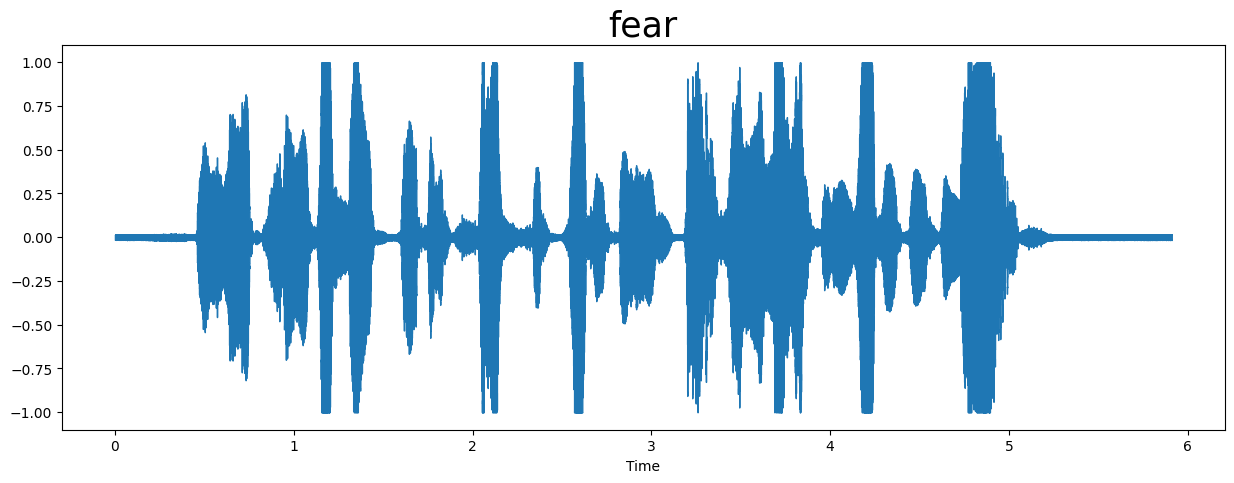

In [16]:
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio_waveforms[8], sr = 44100)

plt.title(str(audio_emotion[8]), size  = 25)

#   THIS IS THE END OF SAVEE

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create data
test_data = CremaD(path="./dataset/test_RAVDESS_20/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getDataRavdess()
test_dataframe = test_data['Emotions'].value_counts()
train_data = CremaD(path="./dataset/train_RAVDESS_80/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getDataRavdess()
train_dataframe = train_data['Emotions'].value_counts()


# Create subplot with two horizontal bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle('RAVDESS Dataset', fontsize=12)

# Plot data1 on ax1
bars1 = ax1.barh(train_dataframe.index, train_dataframe.values, color='#F19C0E')
ax1.set_xlabel('Count', fontsize=10)
ax1.set_title('Train', fontsize=10)
for bar in bars1:
    value = bar.get_width()
    x_pos = value
    y_pos = bar.get_y() + bar.get_height() / 2
    ax1.text(x_pos, y_pos, str(int(value)), va='center', fontsize=8)

# Plot data2 on ax2
bars2 = ax2.barh(test_dataframe.index, test_dataframe.values, color='#BA6422')
ax2.set_xlabel('Count', fontsize=10)
ax2.set_title('Test', fontsize=10)
for bar in bars2:
    value = bar.get_width()
    x_pos = value
    y_pos = bar.get_y() + bar.get_height() / 2
    ax2.text(x_pos, y_pos, str(int(value)), va='center', fontsize=8)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

test_data = CremaD(path="./dataset/test_CREMA_20/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getData()
train_data = CremaD(path="./dataset/train_CREMA_80/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getData()

# plot emotion counts
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,4))
plt.xlabel('Emotions', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.suptitle('CREMA-D Dataset', fontsize=12)
plt.subplot(1,2,1)
plt.title('Test Data', size = 10)
sns.histplot(test_data.Emotions, color='#F19C0E')
plt.subplot(1,2,2)
plt.title('Train Data', size = 10)
sns.histplot(train_data.Emotions, color='#BA6422')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd

# Data splitting
CMD = CremaD(path="./dataset/train_CREMA_95/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
dataset = CMD.getData()

X = dataset.drop(columns=["Emotions"])
y = dataset["Emotions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=123, stratify=y)

test = pd.concat([X_test, y_test], axis=1)
valid_data = test

# Create data
test_data = CremaD(path="./dataset/test_CREMA_5/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getData()
test_dataframe = test_data['Emotions'].value_counts()
train_data = CremaD(path="./dataset/train_CREMA_90/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getData()
train_dataframe = train_data['Emotions'].value_counts()
valid_dataframe = valid_data['Emotions'].value_counts()


# Create subplot with two horizontal bar plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('CREMA-D Dataset', fontsize=12)

# Plot data1 on ax1
bars1 = ax1.barh(train_dataframe.index, train_dataframe.values, color='#F19C0E')
ax1.set_xlabel('Count', fontsize=10)
ax1.set_title('Train', fontsize=10)
for bar in bars1:
    value = bar.get_width()
    x_pos = value
    y_pos = bar.get_y() + bar.get_height() / 2
    ax1.text(x_pos, y_pos, str(int(value)), va='center', fontsize=8)

# Plot data2 on ax2
bars2 = ax2.barh(test_dataframe.index, test_dataframe.values, color='#BA6422')
ax2.set_xlabel('Count', fontsize=10)
ax2.set_title('Test', fontsize=10)
for bar in bars2:
    value = bar.get_width()
    x_pos = value
    y_pos = bar.get_y() + bar.get_height() / 2
    ax2.text(x_pos, y_pos, str(int(value)), va='center', fontsize=8)

# Plot data3 on ax3
bars3 = ax3.barh(valid_dataframe.index, valid_dataframe.values, color='#F5A866')
ax3.set_xlabel('Count', fontsize=10)
ax3.set_title('Validation', fontsize=10)
for bar in bars3:
    value = bar.get_width()
    x_pos = value
    y_pos = bar.get_y() + bar.get_height() / 2
    ax3.text(x_pos, y_pos, str(int(value)), va='center', fontsize=8)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd

# Data splitting
CMD = CremaD(path="./dataset/train_RAVDESS_95/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
dataset = CMD.getDataRavdess()

X = dataset.drop(columns=["Emotions"])
y = dataset["Emotions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=123, stratify=y)

test = pd.concat([X_test, y_test], axis=1)
print(f"Validation Data Set Data : {len(test)}")
print(test["Emotions"].value_counts())

test_data = CremaD(path="./dataset/test_RAVDESS_5/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getDataRavdess()
train_data = CremaD(path="./dataset/train_RAVDESS_90/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).getDataRavdess()
valid_data = test
# plot emotion counts
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,4))
plt.xlabel('Emotions', size = 7)
plt.ylabel('Count', size = 7)
plt.subplot(1,3,1)
plt.title('Test Data Emotion Count', size = 9)
sns.histplot(test_data.Emotions, color='#F19C0E')
plt.subplot(1,3,2)
plt.title('Train Data Emotion Count', size = 9)
sns.histplot(train_data.Emotions, color='#BA6422')
plt.subplot(1,3,3)
plt.title('Validation Data Emotion Count', size = 9)
sns.histplot(test.Emotions, color='#BA6422')

plt.show()

In [ ]:
import os
import pandas as pd
path = "./dataset/RAVDESS/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(path)

file_emotion = []
file_path = []
actor_list = []

for dir in ravdess_directory_list:
    actor = os.listdir(path + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        actor_id = dir.split('_')[-1] 
        actor_list.append(actor_id)
        file_emotion.append(int(part[2]))
        file_path.append(path + dir + '/' + file)

path_df = pd.DataFrame(file_path, columns=['Path'])
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
Ravdess_df = pd.concat([path_df, emotion_df], axis=1)

In [28]:
import pydub
import os

############################### CHECK AUDIO DURATION ###############################
test_path = "./dataset/test_RAVDESS_20/"
train_path = "./dataset/SAVEE/"

# Initialize empty lists to store the duration of each audio file
test_durations, train_duration = [], []

# Loop over each file in the folder and calculate its duration
# for filename in os.listdir(test_path):
#     if filename.endswith(".wav"):
#         file_path = os.path.join(test_path, filename)
#         audio = pydub.AudioSegment.from_file(file_path)
#         duration = len(audio) / 1000
#         test_durations.append(duration)

for filename in os.listdir(train_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(train_path, filename)
        audio = pydub.AudioSegment.from_file(file_path)
        duration = len(audio) / 1000
        train_duration.append(duration)

# Calculate and print the minimum, average, and maximum duration
# min_duration_test = min(test_durations)
# avg_duration_test = sum(test_durations) / len(test_durations)
# max_duration_test = max(test_durations)
min_duration_train = min(train_duration)
avg_duration_train = sum(train_duration) / len(train_duration)
max_duration_train = max(train_duration)

# print(f"Minimum test duration: {min_duration_test:.2f} s")
# print(f"Average test duration: {avg_duration_test:.2f} s")
# print(f"Maximum test duration: {max_duration_test:.2f} s")
print("\n")
print(f"Minimum train duration: {min_duration_train:.2f} s")
print(f"Average train duration: {avg_duration_train:.2f} s")
print(f"Maximum train duration: {max_duration_train:.2f} s")

/Users/rubyamanda/Library/Python/3.9/lib/python/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)




Minimum train duration: 1.63 s
Average train duration: 3.84 s
Maximum train duration: 7.14 s


AudioMetaData(sample_rate=44100, num_frames=149773, num_channels=1, bits_per_sample=16, encoding=PCM_S)


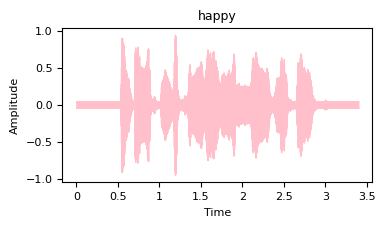

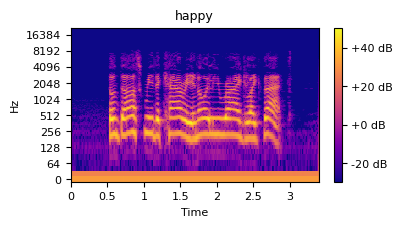

In [9]:
from Code.utils import CremaD
SAMPLE_RATE = 44100
NUM_SAMPLE = 22050
DURATION = 1.63
CMD = CremaD(path="./dataset/SAVEE/DC_h02.wav", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

CMD.audio_info()
CMD.play_audio()
CMD.plot_waveform()
CMD.plot_spectogram()

# Feature Extraction

### Deep Learning Features

In [ ]:
import numpy as np
def find_diff(img_height, img_width):
    remainder_height = img_height % 16
    if remainder_height == 0:
        diff_height = 0
    else:
        diff_height = 16 - remainder_height

    remainder_width = img_width % 4
    if remainder_width == 0:
        diff_width = 0
    else:
        diff_width = 4 - remainder_width

    return diff_height, diff_width


# Define the original input shape
img_channel = X_train.shape[1]
img_height = X_train.shape[2]
img_width = X_train.shape[3]

height_pad, width_pad = find_diff(img_height, img_width)
X_train_padded = np.pad(X_train, ((0, 0), (0, 0), (0,height_pad), (0,width_pad)), mode='constant', constant_values=0)

In [ ]:
X_train_padded.shape

In [ ]:
from Code.utils import CremaD
SAMPLE_RATE = 16000
NUM_SAMPLE = 22050
DURATION = 2.54
CMD = CremaD(path="./dataset/train_RAVDESS_95/03-01-07-01-01-01-01.wav", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

CMD.plot_mfcc()

In [ ]:
from Code.utils import CremaD
SAMPLE_RATE = 16000
NUM_SAMPLE = 22050
DURATION = 2.54
CMD = CremaD(path="./dataset/CREMA-D/1001_DFA_ANG_XX.wav", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

CMD.plot_mfcc()


### Conventional ML Features

In [ ]:
from Code.utils import CremaD
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 2
CMD = CremaD(path="./dataset/test/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

fitur = CMD.extract_audio_svm()
fitur

# SVM Model

In [7]:
import pandas as pd
def manual_label_encoder(data):
    mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
    if type(data) == pd.core.series.Series:
        encoded_data = data.map(mapping)
    else:
        encoded_data = [mapping[i] for i in data]

    return encoded_data

def reverse_label_encoder(data):
    mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
    reverse_mapping_dict = {v: k for k, v in mapping.items()}
    return [reverse_mapping_dict[label] for label in data]

In [9]:
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from Code.utils import CremaD

test_path = "./dataset/test_CREMA_10/"
SAMPLE_RATE = 16000
NUM_SAMPLE = 22050
DURATION = 2.54

scaler = joblib.load("./Scaler/LeNetScaler.joblib")
test_data = CremaD(path=test_path, sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).extract_audio_svm()

test_data['Emotions'] = manual_label_encoder(test_data['Emotions'])

X_test = test_data.drop(labels='Emotions', axis= 1)
y_test = test_data['Emotions']

# X_test_scaled = scaler.transform(X_test)

# Load the model from file
loaded_model = joblib.load('./ML_Model/cnnModel-012.pkl')
y_pred = loaded_model.predict(X_test_scaled)

y_test_str = reverse_label_encoder(y_test)
y_pred_str = reverse_label_encoder(y_pred)

report=classification_report(y_test_str, y_pred_str)
accuracy=accuracy_score(y_true=y_test_str, y_pred=y_pred_str)

print("\nModel Summary:\n")
print("Model:{}    Accuracy: {:.2f}%".format(type(loaded_model).__name__ , accuracy*100))
print(report)

print("The Model's Prediction ")
print("<<<===========================================>>>")
df = pd.DataFrame({'Actual': y_test_str, 'Predict': y_pred_str})
print(df.head(20))

# Compute the confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str)


 Processed 745/745 audio waveforms

Waveforms:
 Processed 745/745 waveform features

Features set: 745 total samples
Features (MFC coefficient matrix) shape: 40 mel frequency coefficients x 80 time steps


UnpicklingError: persistent IDs in protocol 0 must be ASCII strings

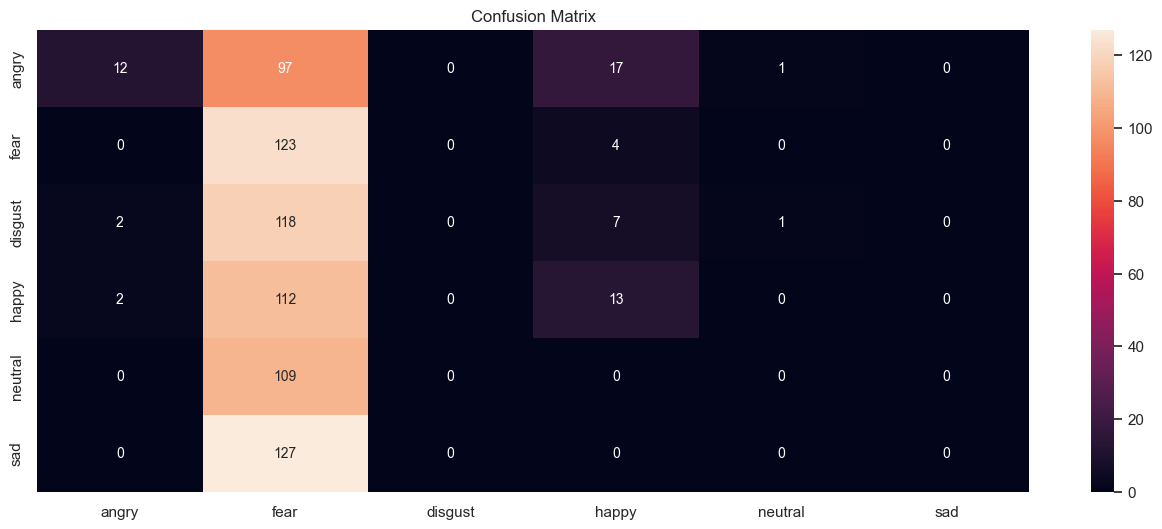

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# set labels for matrix axes from emotions
emotion_list = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(cm, index=emotion_list, columns=emotion_list)

# plot confusion matrices
plt.figure(figsize=(16,6))
sns.set(font_scale=1)
plt.title('Confusion Matrix')
sns.heatmap(confmatrix_df, annot=True, annot_kws={"size": 10}, fmt="d")

plt.show()

In [ ]:
from Code.utils import load_model

load_model("./dataset/test/1089_DFA_ANG_XX.wav", "svm_model.sav").getModelPrediction()

# CNN Model

In [ ]:
from Code.utils import CremaD
from Code.utils import Transformation
from Code.cnn import CNNNetwork
from torch.utils.data import DataLoader
from torch import nn
import torch
import librosa
import numpy as np

In [ ]:
def awgn_augmentation(waveform, multiples=2, bits=16, snr_min=15, snr_max=30): 
    
    # get length of waveform (should be 3*48k = 144k)
    wave_len = len(waveform)
    
    # Generate normally distributed (Gaussian) noises
    # one for each waveform and multiple (i.e. wave_len*multiples noises)
    noise = np.random.normal(size=(multiples, wave_len))
    
    # Normalize waveform and noise
    norm_constant = 2.0**(bits-1)
    norm_wave = waveform / norm_constant
    norm_noise = noise / norm_constant
    
    # Compute power of waveform and power of noise
    signal_power = np.sum(norm_wave ** 2) / wave_len
    noise_power = np.sum(norm_noise ** 2, axis=1) / wave_len
    
    # Choose random SNR in decibels in range [15,30]
    snr = np.random.randint(snr_min, snr_max)
    
    # Apply whitening transformation: make the Gaussian noise into Gaussian white noise
    # Compute the covariance matrix used to whiten each noise 
    # actual SNR = signal/noise (power)
    # actual noise power = 10**(-snr/10)
    covariance = np.sqrt((signal_power / noise_power) * 10 ** (- snr / 10))
    # Get covariance matrix with dim: (144000, 2) so we can transform 2 noises: dim (2, 144000)
    covariance = np.ones((wave_len, multiples)) * covariance

    # Since covariance and noise are arrays, * is the haddamard product 
    # Take Haddamard product of covariance and noise to generate white noise
    multiple_augmented_waveforms = waveform + covariance.T * noise
    
    return multiple_augmented_waveforms
def augment_waveforms(waveforms, features, emotions, multiples):
    # keep track of how many waveforms we've processed so we can add correct emotion label in the same order
    emotion_count = 0
    # keep track of how many augmented samples we've added
    added_count = 0
    # convert emotion array to list for more efficient appending
    emotions = emotions.tolist()

    for waveform in waveforms:

        # Generate 2 augmented multiples of the dataset, i.e. 1440 native + 1440*2 noisy = 4320 samples total
        augmented_waveforms = awgn_augmentation(waveform, multiples=multiples)

        # compute spectrogram for each of 2 augmented waveforms
        for augmented_waveform in augmented_waveforms:

            # Compute MFCCs over augmented waveforms
            augmented_mfcc = feature_mfcc(augmented_waveform, sample_rate=SAMPLE_RATE)

            # append the augmented spectrogram to the rest of the native data
            features.append(augmented_mfcc)
            emotions.append(emotions[emotion_count])

            # keep track of new augmented samples
            added_count += 1

            # check progress
            print('\r'+f'Processed {emotion_count + 1}/{len(waveforms)} waveforms for {added_count}/{len(waveforms)*multiples} new augmented samples',end='')

        # keep track of the emotion labels to append in order
        emotion_count += 1
        
        # store augmented waveforms to check their shape
        augmented_waveforms_temp.append(augmented_waveforms)
    
    return features, emotions

In [ ]:
# store augmented waveforms to verify their shape and random-ness
augmented_waveforms_temp = []

# specify multiples of our dataset to add as augmented data
multiples = 2

print('Train waveforms:') # augment waveforms of training set
features_train , y_train = augment_waveforms(X_train, features_train, y_train, multiples)

print('\n\nValidation waveforms:') # augment waveforms of validation set
features_valid, y_valid = augment_waveforms(X_valid, features_valid, y_valid, multiples)

print('\n\nTest waveforms:') # augment waveforms of test set 
features_test, y_test = augment_waveforms(X_test, features_test, y_test, multiples)

# Check new shape of extracted features and data:
print(f'\n\nNative + Augmented Features set: {len(features_train)+len(features_test)+len(features_valid)} total, {len(features_train)} train, {len(features_valid)} validation, {len(features_test)} test samples')
print(f'{len(y_train)} training sample labels, {len(y_valid)} validation sample labels, {len(y_test)} test sample labels')
print(f'Features (MFCC matrix) shape: {len(features_train[0])} mel frequency coefficients x {len(features_train[0][1])} time steps')

In [ ]:
import matplotlib.pyplot as plt
# pick a random waveform, but same one from native and augmented set for easier comparison
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(waveforms_testing[12], sr=SAMPLE_RATE)
plt.title('Native')

plt.subplot(1, 2, 2)
# augmented waveforms are 2D len 1440 list with 2 waveforms in each position
librosa.display.waveshow(augmented_waveforms_temp[0][0], sr=SAMPLE_RATE)
plt.title('AWGN Augmented')
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(augmented_waveforms_temp[2][0], sr=SAMPLE_RATE)
plt.title('AWGN Augmented')

plt.subplot(1, 2, 2)
librosa.display.waveshow(augmented_waveforms_temp[7][0], sr=SAMPLE_RATE)
plt.title('AWGN Augmented')
plt.show()

In [1]:
#################### CREATE READY TO TRAIN DATA ####################
from Code.utils import CremaD

SAMPLE_RATE = 48000
NUM_SAMPLE = 22050
DURATION = 5.27

test_data = "./dataset/test_RAVDESS_10/"
train_data = "./dataset/train_RAVDESS_90/"

# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
CMD = CremaD(path="plerpler", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
X_train, X_valid, X_test, y_train, y_valid, y_test = CMD.create_readyToTrain_data(test_data=test_data, train_data=train_data)

Path is now ./dataset/test_RAVDESS_10/
 Processed 106/106 audio waveforms
Path is now ./dataset/train_RAVDESS_90/
 Processed 950/950 audio waveforms

Splitting train and validation data...

Training waveforms:(950, 252959), y_train:(950,)
Validation waveforms:(53, 252959), y_valid:(53,)
Test waveforms:(53, 252959), y_test:(53,)

Train Set Data : 950
Train Emotion Count
[0 1 2 3 4 5] [173 173 173 172  86 173]
Validation Set Data : 53
Validation Emotion Count
[0 1 2 3 4 5] [ 9  9 10 10  5 10]
Test Set Data : 53
Test Emotion Count
[0 1 2 3 4 5] [10 10  9 10  5  9]

Extracting Train waveforms:
 Processed 950/950 waveform features

Extracting Validation waveforms:
 Processed 53/53 waveform features

Extracting Test waveforms:
 Processed 53/53 waveform features

Extracted Features set: 1056 total, 950 train, 53 validation, and 53 test data
Features shape: 40 mel frequency coefficients x 495 time steps

Shape of 4D feature array for input tensor: (950, 1, 40, 495) train, (53, 1, 40, 495) vali

In [1]:
from Code.utils import CremaD

SAMPLE_RATE = 48000
NUM_SAMPLE = 22050
DURATION = 5.27

CMD = CremaD(path="plerpler", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
X_train, X_valid, X_test, y_train, y_valid, y_test = CMD.load_readyToTrain_data("./Scaler/CREMA-D_ready_data_CRNN.npy")

Data Loaded with shape:
X_train:(950, 1, 40, 495), y_train:(950,)
X_valid:(53, 1, 40, 495), y_valid:(53,)
X_test:(53, 1, 40, 495), y_test:(53,)


### Training

In [2]:
from Code.utils import DeepLearning
from Code.TransformerCnn import TransformerCNNNetwork
from Code.LeNet import LeNet
from Code.CRNN import CRNN
from Code.ResNet import ResNet

SAMPLE_RATE = 48000
DURATION = 5.27
NUM_EPOCH = 130

# CREMA-D 100
# RAVDESS 150
path = "./Scaler/CREMA-D_ready_data_CRNN.npy"

# CRNN(img_channel=1, img_height=40, img_width=350, num_class=6)
# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
DL = DeepLearning(sample_rate=SAMPLE_RATE, duration=DURATION)
train_losses, valid_losses, train_accuracy, valid_accuracy = DL.train(train_file=path, model=CRNN(img_channel=1, img_height=40, img_width=495, num_class=6), num_epochs=NUM_EPOCH)

Data Loaded with shape:
X_train:(950, 1, 40, 495), y_train:(950,)
X_valid:(53, 1, 40, 495), y_valid:(53,)
X_test:(53, 1, 40, 495), y_test:(53,)
(950, 1, 48, 496) (53, 1, 48, 496)

cuda selected
Number of trainable params:  7855942

Start Training...
Epoch 1: iteration 28/29
Epoch 1 --- loss:1.75, Epoch accuracy:17.89%, Validation loss:1.79, Validation accuracy:16.98%
Epoch 2: iteration 28/29
Epoch 2 --- loss:1.75, Epoch accuracy:17.79%, Validation loss:1.79, Validation accuracy:16.98%
Epoch 3: iteration 28/29
Epoch 3 --- loss:1.75, Epoch accuracy:17.68%, Validation loss:1.79, Validation accuracy:16.98%
Epoch 4: iteration 28/29
Epoch 4 --- loss:1.74, Epoch accuracy:17.89%, Validation loss:1.78, Validation accuracy:18.87%
Epoch 5: iteration 28/29
Epoch 5 --- loss:1.74, Epoch accuracy:17.79%, Validation loss:1.78, Validation accuracy:18.87%
Epoch 6: iteration 28/29
Epoch 6 --- loss:1.74, Epoch accuracy:18.42%, Validation loss:1.78, Validation accuracy:20.75%
Epoch 7: iteration 28/29
Epoch

KeyboardInterrupt: 

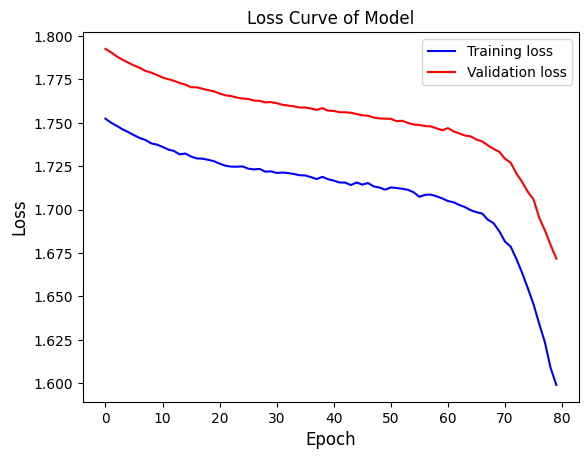

In [3]:
import matplotlib.pyplot as plt
plt.title('Loss Curve of Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.plot(train_losses[:],'b')
plt.plot(valid_losses[:],'r')
# plt.ylim(0, 10)
plt.legend(['Training loss','Validation loss'])
plt.show()

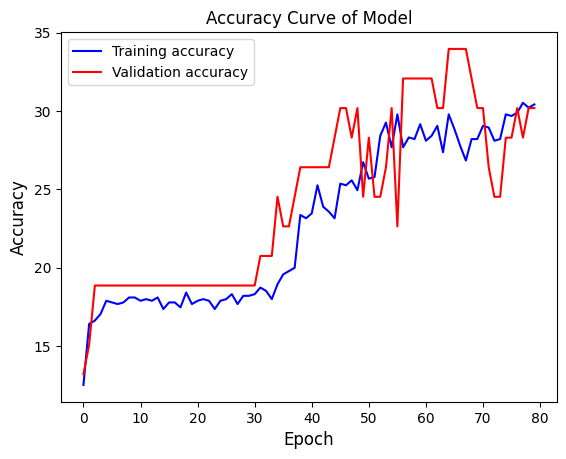

In [4]:
import matplotlib.pyplot as plt

plt.title('Accuracy Curve of Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.plot(train_accuracy[:],'b')
plt.plot(valid_accuracy[:],'r')
plt.legend(['Training accuracy','Validation accuracy'])
plt.show()

### Prediction

In [ ]:
def train_single_epoch(model, optimizer, criterion):
        # define the training step of the training phase
        def train_step(X,Y):  
            # forward pass
            output_logits, output_softmax = model(X)
            predictions = torch.argmax(output_softmax,dim=1)
            accuracy = torch.sum(Y==predictions)/float(len(Y))
            
            # compute loss on logits because nn.CrossEntropyLoss implements log softmax
            loss = criterion(input=output_logits, target=Y)
            # loss = criterion(output_logits, Y) 
            
            # compute gradients for the optimizer to use 
            loss.backward()
            
            # update network parameters based on gradient stored (by calling loss.backward())
            optimizer.step()
            
            # zero out gradients for next pass
            # pytorch accumulates gradients from backwards passes (convenient for RNNs)
            optimizer.zero_grad() 
            return loss.item(), accuracy*100
        return train_step
    
def validate_single_epoch(model, criterion):
    def validate(X,Y):
        # don't want to update any network parameters on validation passes: don't need gradient
        # wrap in torch.no_grad to save memory and compute in validation phase: 
        with torch.no_grad(): 
            # set model to validation phase i.e. turn off dropout and batchnorm layers 
            model.eval()
            # get the model's predictions on the validation set
            output_logits, output_softmax = model(X)
            predictions = torch.argmax(output_softmax,dim=1)
            # calculate the mean accuracy over the entire validation set
            accuracy = torch.sum(Y==predictions)/float(len(Y))
            # compute error from logits (nn.crossentropy implements softmax)
            loss = criterion(input=output_logits, target=Y)
            # loss = criterion(output_logits,Y)
        return loss.item(), accuracy*100, predictions
    return validate

def make_save_checkpoint(): 
    def save_checkpoint(optimizer, model, epoch, filename):
        checkpoint_dict = {
            'optimizer': optimizer.state_dict(),
            'model': model.state_dict(),
            'epoch': epoch
        }
        torch.save(checkpoint_dict, filename)
    return save_checkpoint

def load_checkpoint( optimizer, model, filename):
    checkpoint_dict = torch.load(filename)
    epoch = checkpoint_dict['epoch']
    model.load_state_dict(checkpoint_dict['model'])
    if optimizer is not None:
        optimizer.load_state_dict(checkpoint_dict['optimizer'])
    return epoch

In [6]:
import numpy as np
def find_diff(img_height, img_width):
    remainder_height = img_height % 16
    if remainder_height == 0:
        diff_height = 0
    else:
        diff_height = 16 - remainder_height

    remainder_width = img_width % 4
    if remainder_width == 0:
        diff_width = 0
    else:
        diff_width = 4 - remainder_width

    return diff_height, diff_width

img_height = X_train.shape[2]
img_width = X_train.shape[3]
diff_height, diff_width = find_diff(img_height, img_width)

X_test = np.pad(X_test, ((0, 0), (0, 0), (0,diff_height), (0,diff_width)), mode='constant', constant_values=0)

In [7]:
from Code.TransformerCnn import TransformerCNNNetwork
from Code.LeNet import LeNet
from Code.ResNet import ResNet
from Code.CRNN import CRNN
import torch
from torch import nn
import os
from Code.utils import DeepLearning


path = "./Scaler/CREMA-D_ready_data_CRNN.npy"

# label_mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
DL = DeepLearning(sample_rate=SAMPLE_RATE, duration=DURATION)
# pick load folder  
load_folder = './Checkpoint/'
acc_list = []

for i in range(NUM_EPOCH):
    # pick the epoch to load
    model_name = f'cnnModel-{i+1:03d}.pkl'

    # make full load path
    load_path = os.path.join(load_folder, model_name)

    ## instantiate empty model and populate with params from binary 
    model = CRNN(img_channel=1, img_height=40, img_width=495, num_class=6).to("cuda")
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=0.001, momentum=0.8)
    DL.load_checkpoint(optimizer, model, load_path)
    
    print('\r'+f' Loaded model from {load_path}',end='')

    # reinitialize validation function with model from chosen checkpoint
    criterion = nn.CrossEntropyLoss()
    validate = DL.validate_single_epoch(model,criterion)

    # Convert 4D test feature set array to tensor and move to GPU
    X_test_tensor = torch.tensor(X_test,device="cuda").float()
    # Convert 4D test label set array to tensor and move to GPU
    y_test_tensor = torch.tensor(y_test,dtype=torch.long,device="cuda")

    # Get the model's performance metrics using the validation function we defined
    test_loss, test_acc, predicted_emotions = validate(X_test_tensor,y_test_tensor)
    acc_list.append(test_acc)

    print(f'Test accuracy is {test_acc:.2f}%')
print(f"Maximum accuracy = {max(acc_list):.2f}%")

 Loaded model from ./Checkpoint/cnnModel-001.pklTest accuracy is 18.87%
 Loaded model from ./Checkpoint/cnnModel-002.pklTest accuracy is 18.87%
 Loaded model from ./Checkpoint/cnnModel-003.pklTest accuracy is 22.64%
 Loaded model from ./Checkpoint/cnnModel-004.pklTest accuracy is 22.64%
 Loaded model from ./Checkpoint/cnnModel-005.pklTest accuracy is 18.87%
 Loaded model from ./Checkpoint/cnnModel-006.pklTest accuracy is 24.53%
 Loaded model from ./Checkpoint/cnnModel-007.pklTest accuracy is 26.42%
 Loaded model from ./Checkpoint/cnnModel-008.pklTest accuracy is 24.53%
 Loaded model from ./Checkpoint/cnnModel-009.pklTest accuracy is 18.87%
 Loaded model from ./Checkpoint/cnnModel-010.pklTest accuracy is 22.64%
 Loaded model from ./Checkpoint/cnnModel-011.pklTest accuracy is 22.64%
 Loaded model from ./Checkpoint/cnnModel-012.pklTest accuracy is 24.53%
 Loaded model from ./Checkpoint/cnnModel-013.pklTest accuracy is 22.64%
 Loaded model from ./Checkpoint/cnnModel-014.pklTest accuracy is

In [ ]:
# reinitialize validation function with model from chosen checkpoint
criterion = nn.CrossEntropyLoss()
validate = validate_single_epoch(model,criterion)

# Convert 4D test feature set array to tensor and move to GPU
X_test_tensor = torch.tensor(X_test,device="cuda").float()
# Convert 4D test label set array to tensor and move to GPU
y_test_tensor = torch.tensor(y_test,dtype=torch.long,device="cuda")

# Get the model's performance metrics using the validation function we defined
test_loss, test_acc, predicted_emotions = validate(X_test_tensor,y_test_tensor)

print(f'Test accuracy is {test_acc:.2f}%')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

emotion_list = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']
# because model tested on GPU, move prediction tensor to CPU then convert to array
predicted_emotions = predicted_emotions.to("cpu").numpy()
# use labels from test set
emotions_groundtruth = y_test

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(emotions_groundtruth, predicted_emotions)
conf_matrix_norm = confusion_matrix(emotions_groundtruth, predicted_emotions,normalize='true')

# set labels for matrix axes from emotions
emotion_names = [emotion for emotion in emotion_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=emotion_names, columns=emotion_names)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=emotion_names, columns=emotion_names)

# plot confusion matrices
plt.figure(figsize=(16,6))
sns.set(font_scale=1)
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sns.heatmap(confmatrix_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sns.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 10})

plt.show()

In [ ]:
def feature_mfcc(waveform, sample_rate, n_mfcc = 40, fft = 1024, winlen = 512, window='hamming', mels=128):
    mfc_coefficients=librosa.feature.mfcc(
                        y=waveform, 
                        sr=sample_rate, 
                        n_mfcc=n_mfcc,
                        n_fft=fft, 
                        win_length=winlen, 
                        window=window, 
                        #hop_length=hop, 
                        n_mels=mels, 
                        fmax=sample_rate/2) 
    return mfc_coefficients


def get_features(waveforms, features, sample_rate):

    # initialize counter to track progress
    file_count = 0

    # process each waveform individually to get its MFCCs
    for waveform in waveforms:
        mfccs = feature_mfcc(waveform, sample_rate)
        features.append(mfccs)
        file_count += 1
        # print progress
        print('\r'+f' Processed {file_count}/{len(waveforms)} waveforms',end='')

    # return all features from list of waveforms
    return features

def make_prediction(model, data):
    with torch.no_grad(): 
        model.eval()
        _, output_softmax = model(data)
        return output_softmax

In [ ]:
import librosa
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from Code.cnn import CNNNetwork
from Code.LeNet import LeNet
import os
import joblib

############################## LOAD MODEL ##############################
# pick load folder  
load_folder = './Checkpoint/'  

# pick the epoch to load
epoch = '049'
model_name = f'cnnModel-{epoch}.pkl'

# make full load path
load_path = os.path.join(load_folder, model_name)

## instantiate empty model and populate with params from binary 
model = CNNNetwork().to("cuda")
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=0.001, momentum=0.8)
load_checkpoint(optimizer, model, load_path)

print(f'Loaded model from {load_path}')

############################## PRE-PROCESS AUDIO ##############################

features_test = []
emotion_list = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']

audio_file = './dataset/test/1068_WSI_HAP_XX.wav'

waveform, _ = librosa.load(audio_file, duration=2, offset=0.5, sr=22050)
waveform_homo = np.zeros((int(22050*2)))
waveform_homo[:len(waveform)] = waveform

array_wave = np.array(waveform_homo, dtype=np.float64)
m = 1  # number of rows
n = array_wave.shape[0]  # number of columns
X_2d = array_wave.reshape((m, n))
print(X_2d.shape)
features_test = get_features(X_2d, features_test, 22050)

XTest = np.expand_dims(features_test,1)

scaler = joblib.load('./Scaler/CNNScaler.joblib')
BATCH,CHANNEL,WIDTH,HEIGHT = XTest.shape
XTest = np.reshape(XTest, (BATCH,-1))
XTest = scaler.transform(XTest)
XTest = np.reshape(XTest, (BATCH,CHANNEL,WIDTH,HEIGHT))
print(f'Shape of 4D feature array for input tensor: {XTest.shape}')

############################## MAKE PREDICTION ##############################
X_test_tensor = torch.tensor(XTest,device="cuda").float()
predictions = make_prediction(model,X_test_tensor)

output_dict = {}
for i in range(len(emotion_list)):
    output_dict[emotion_list[i]] = predictions[0][i].item()
    
print(output_dict)